In [1]:
import random
import math
from csv import reader
import pandas as pd
import numpy as np
import random as rd
from statistics import mean
import sys
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from matplotlib import style

style.use('ggplot')
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Actual no of tuples belongs to 'Yes' class: 212
Actual no of tuples belongs to 'No' class: 55
Max iter: 2000
After clustering no of tuples belongs to 'Yes' class: 258
After clustering no of tuples belongs to 'No' class: 9
Accuracy: 76.02996254681648
Precision: 78.68217054263566
Recall: 95.75471698113208
Confusion matrix:
TrueP= 203
TrueN= 0
FalseP= 55
FalseN= 9

Confusion matrix, without normalization


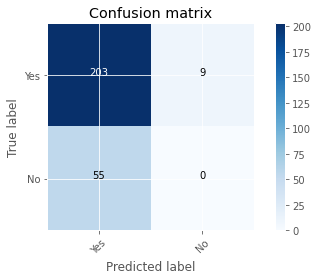

In [2]:

def TrueP(actual,predicted):
	count=0

	for i in range(len(actual)):
		if actual[i]=='Yes' and predicted[i]=='Yes':
			count+=1
	return count

def TrueN(actual,predicted):
	count=0
	
	for i in range(len(actual)):
		if actual[i]=='No' and predicted[i]=='No':
			count+=1
	return count

def FalseP(actual,predicted):
	count=0
	
	for i in range(len(actual)):
		if actual[i]=='No' and predicted[i]=='Yes':
			count+=1
	return count

def FalseN(actual,predicted):
	count=0

	for i in range(len(actual)):
		if actual[i]=='Yes' and predicted[i]=='No':
			count+=1
	return count

def compute_mem_matrix(m,x,clusters,curr):
	res=[]
	sum=0
	for i in range(len(x)):
		U=0
		
		if x[i]==curr[i]:
			U=1
		else:
			ans=0
			flag=True
			for c in clusters:
				if x[i]==clusters[c][i]:
					U=0
					flag=False
					break
				ans+=pow((abs(x[i]-curr[i])/abs(x[i]-clusters[c][i])),(2/(m-1)))
			if flag:
				U=1/ans
				#print(U)
		res.append((U,x[i]))
		sum+=U

	return [res,sum]

def compute_cluster_center(m,U_X):
	U=[]
	X=[]
	for i in U_X:
		U.append(i[0])
		X.append(i[1])
	num=0
	den=0
	for i in range(len(U)):
		#print(U[i]," ",X[i])
		num+=(pow(U[i],m)*X[i])
		den+=pow(U[i],m)
	c=num/den
	return c

def cMean(clusters,dataset,m):
	prev={'Yes':clusters['Yes'],'No':clusters['No']}
	final_cluster={'Yes':[],'No':'No'}
	arr=['No' for i in range(len(dataset))]
	epoch=1
	for i in range(2000):
		cluster_Y=[]
		cluster_N=[]
		#print(epoch)
		for i in range(len(dataset)):
			if dataset[i]==clusters['Yes']:
				arr[i]='Yes'
				ans=[(1,dataset[i][j]) for j in range(len(dataset[i]))]
				#print(ans)
				cluster_Y.append(ans)
				continue
			elif dataset[i]==clusters['No']:
				arr[i]='No'
				ans=[(1,dataset[i][j]) for j in range(len(dataset[i]))]
				#print(ans)
				cluster_N.append(ans)
				continue

			c1=compute_mem_matrix(m,dataset[i],clusters,clusters['Yes'])
			c2=compute_mem_matrix(m,dataset[i],clusters,clusters['No'])

			if c1[1]>c2[1]:
				arr[i]='Yes'
				cluster_Y.append(c1[0])

			else:
				arr[i]='No'
				cluster_N.append(c2[0])
		res_Y=[]
		res_N=[]
		for j in range(len(cluster_Y[0])):
			U_X=[]
			for i in range(len(cluster_Y)):
				U_X.append(cluster_Y[i][j])
			res_Y.append(compute_cluster_center(m,U_X))
		clusters['Yes']=res_Y

		for j in range(len(cluster_N[0])):
			U_X=[]
			for i in range(len(cluster_N)):
				U_X.append(cluster_N[i][j])
			res_N.append(compute_cluster_center(m,U_X))

		clusters['No']=res_N
		#print(clusters)
		if clusters['Yes']==prev['Yes'] and clusters['No']==prev['No']:
			print('Converged before Max iter i.e., no of iter:',epoch)
			return arr
		prev={'Yes':clusters['Yes'],'No':clusters['No']}
		epoch+=1
		
	print('Max iter:',epoch-1)
	return arr

def remove_index(dataset):
	brr=[]
	for i in dataset:
		brr.append(i.pop(0))
	return [dataset,brr]

def load_csv(filename):
	dataset=[]
	with open(filename,'r') as file:
		csv_reader=reader(file)
		for row in csv_reader:
			dataset.append(row)
	dataset.pop(0)
	return dataset

def main():
	k=2
	m=2
	filename='Datasets/SPECTF.csv'
	dataset=load_csv(filename)
	random.shuffle(dataset)
	clusters={}
	res=[]
	res1=random.sample(dataset,2)
	for i in res1:
		res.append(list(i))
	

	res[0].pop(0)
	res[1].pop(0)
	for i in range(len(res[0])):
		res[0][i]=float(res[0][i].strip())
		res[1][i]=float(res[1][i].strip())

	clusters={'Yes':res[0],'No':res[1]}
	crr=remove_index(dataset)
	dataset=crr[0]

	for i in range(len(dataset[0])):
		for row in dataset:
			row[i]=float(row[i].strip())
	brr=crr[1]
	print("Actual no of tuples belongs to 'Yes' class:",brr.count('Yes'))
	print("Actual no of tuples belongs to 'No' class:",brr.count('No'))
	final_cluster=cMean(clusters,dataset,m)
	acc=0
	for i in range(len(dataset)):
		#print(brr[i]," ",final_cluster[i])
		if brr[i]==final_cluster[i]:
			acc+=1
	acc=acc/len(dataset)*100
	flag=True
	if acc<50:
		acc=100-acc
		flag=False


	if flag==False:
		for i in range(len(final_cluster)):
			if final_cluster[i]=='No':
				final_cluster[i]='Yes'
			else:
				final_cluster[i]='No'
	print("After clustering no of tuples belongs to 'Yes' class:",final_cluster.count('Yes'))
	print("After clustering no of tuples belongs to 'No' class:",final_cluster.count('No'))
	pre=TrueP(brr,final_cluster)/(TrueP(brr,final_cluster)+FalseP(brr,final_cluster))
	recall=TrueP(brr,final_cluster)/(TrueP(brr,final_cluster)+FalseN(brr,final_cluster))
	print("Accuracy:",acc)
	print("Precision:",pre*100)
	print("Recall:",recall*100)

	print("Confusion matrix:")
	print("TrueP=",TrueP(brr,final_cluster))
	print("TrueN=",TrueN(brr,final_cluster))
	print("FalseP=",FalseP(brr,final_cluster))
	print("FalseN=",FalseN(brr,final_cluster))
	print()
	class_names=['Yes', 'No']
	#print(brr)
	#print(final_cluster)
	ret_array=confusion_matrix(brr, final_cluster, labels=class_names)
	plot_confusion_matrix(ret_array, class_names,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues)
if __name__ == '__main__':
	main()